In [ ]:
#Libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.simplefilter('ignore')

In [ ]:
#Iris Dataset for classification
iris = datasets.load_iris()
#Convert to dataframe
iris_pd = pd.DataFrame(iris.data)
#Feature name
iris_pd.columns=iris.feature_names
#Target name
iris_pd['Class']=iris.target
#iris_pd is the final dataset

#California Dataset for regression
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
california_pd = pd.DataFrame(housing.data)
california_pd.columns = housing.feature_names
california_pd['MedHouseVal'] = housing.target

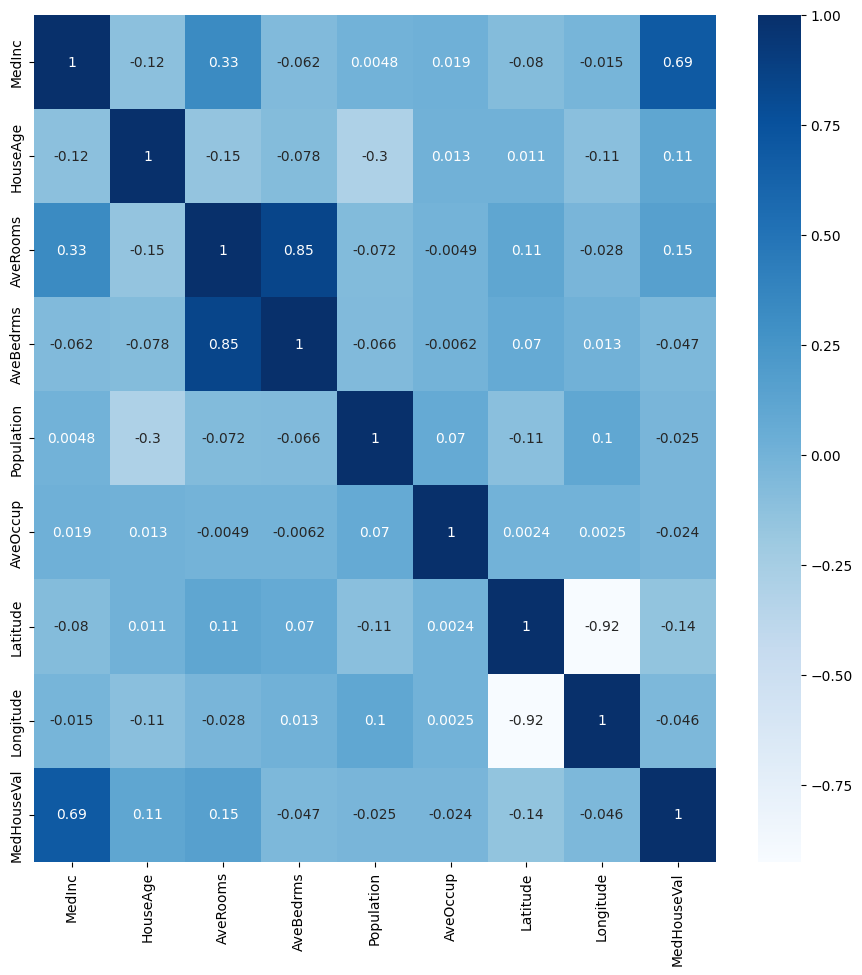

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(11,11)) #Sample figsize in inches, change the number accordingly
sns.heatmap(california_pd.corr(method='pearson'),annot=True,cmap='Blues',ax=ax)
plt.show()

#MEDV and LSTAT is having -0.85 , we might need to remove one variable

In [ ]:
#1)VIF
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):

  #Calculate VIF
  vif = pd.DataFrame()
  vif["variables"] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)

#Remove dependent column first and then apply VIF
x = california_pd.iloc[:,:-1]
calc_vif(x)

,variables,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [ ]:
#2)Categorical vs Categorical- Chi Square Test
iris_pd.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
#Datatypes
print("Datatypes of iris dataset")
iris_pd.dtypes

Datatypes of iris dataset


,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
Class,int64


In [ ]:
iris_pd["petal width (cm)"].describe()


,petal width (cm)
count,150.000000
mean,1.199333
std,0.762238
min,0.100000
25%,0.300000
50%,1.300000
75%,1.800000
max,2.500000


In [ ]:
#So median is 1.3
bin_label=['LOW','HIGH']
iris_pd['Bin_Petal_Width']=pd.qcut(iris_pd['petal width (cm)'],q=2,labels=bin_label)

iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Bin_Petal_Width
0,5.1,3.5,1.4,0.2,0,LOW
1,4.9,3.0,1.4,0.2,0,LOW
2,4.7,3.2,1.3,0.2,0,LOW
3,4.6,3.1,1.5,0.2,0,LOW
4,5.0,3.6,1.4,0.2,0,LOW


In [ ]:
#Frequency Count
iris_pd['Bin_Petal_Width'].value_counts()

,count
Bin_Petal_Width,
LOW,78
HIGH,72


In [ ]:
#Convert Target column to categorical
iris_pd['Class']= iris_pd['Class'].astype('category')
#so datatype is
print("Final Datatypes")
iris_pd.dtypes

Final Datatypes


,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
Class,category
Bin_Petal_Width,category


In [ ]:
#Now we can check interaction effect between class and bin_petal_width through chi square test
#First create contigency table
contingency_table = pd.crosstab(iris_pd['Bin_Petal_Width'],iris_pd['Class'])
print("Contingency Table")
print(contingency_table)

Contingency Table
Class             0   1   2
Bin_Petal_Width            
LOW              50  28   0
HIGH              0  22  50


In [ ]:
#Alternate hypothesis - petal width (bins) has some affect on class

#Chi square test
from scipy import stats
chi2_stat,p_val,dof,ex=stats.chi2_contingency(contingency_table)
#chi- square test values
print("Chi2 value",chi2_stat)
print("Degree of Freedom",dof)
print("P Value",p_val)
print("Expected Freq")
print(ex)

Chi2 value 100.64102564102565
Degree of Freedom 2
P Value 1.3998417931687032e-22
Expected Freq
[[26. 26. 26.]
 [24. 24. 24.]]


In [ ]:
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Bin_Petal_Width
0,5.1,3.5,1.4,0.2,0,LOW
1,4.9,3.0,1.4,0.2,0,LOW
2,4.7,3.2,1.3,0.2,0,LOW
3,4.6,3.1,1.5,0.2,0,LOW
4,5.0,3.6,1.4,0.2,0,LOW


<Axes: xlabel='Class', ylabel='sepal length (cm)'>

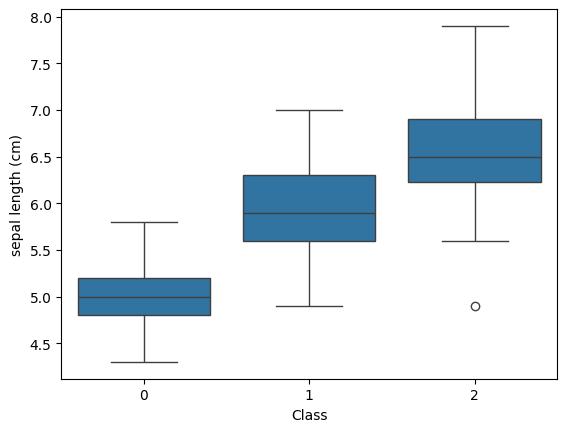

In [ ]:
#3) Categorical and numerical columns -T test, Z Test and ANOVA
#Null hypothesis:
#Sepal length has no AFFECT on class
#There is no

#Let's plot the boxplot
sns.boxplot(x='Class',y='sepal length (cm)',data=iris_pd)

In [ ]:
#Use Z-test
print("Number of samples in the set: ", len(iris_pd))
print("Therefore USE Z-TEST")

ztest, pval = stests.ztest(iris_pd['Class'], iris_pd['sepal length (cm)'], alternative='two-sided')
print("Z-test Value is ", ztest)
print("P-value is ", pval)

#Interference:
#P Value is less than 0.05 so REJECT NULL HYPOTHESIS
#In other words, Sepal length can be a good predictor for Class

Number of samples in the set:  150
Therefore USE Z-TEST
Z-test Value is  -50.92447470978208
P-value is  0.0


In [ ]:
#ANOVA TEST

#for sepal width
iris_pd['Bin_Sepal_Width']=pd.qcut(iris_pd['sepal width (cm)'], q=[0, 0.5, 1], labels=bin_label)

#Remove the space and other symbols in Column name to use in a model
iris_pd.columns = iris_pd.columns.str.replace(' ','')
iris_pd.columns = iris_pd.columns.str.replace('(cm)','')
iris_pd.columns = iris_pd.columns.str.replace('[^a-zA-Z]','')

In [ ]:
iris_pd['Class'] = iris_pd['Class'].astype('int')

#Building Regression Model
model = ols('Class ~ C(Bin_Petal_Width) *C(Bin_Sepal_Width)', iris_pd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     177.8
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.55e-48
Time:                        09:33:27   Log-Likelihood:                -67.119
No. Observations:                 150   AIC:                             142.2
Df Residuals:                     146   BIC:                             154.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 0.7778      0.064     12.163      0.000       0.651       0.904
C(Bin_Petal_Width)[T.HIGH]                                0.9243      0.085     10.878      0.000       0.756       1.092
C(Bin_Sepal_Width)[T.HIGH]                               -0.7778      0.087     -8.925      0.000      -0.950      -0.606
C(Bin_Petal_Width)[T.HIGH]:C(Bin_Sepal_Width)[T.HIGH]     0.7557      0.129      5.862      0.000       0.501       1.010
==============================================================================
Omnibus:                       25.008   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.614
Skew:                          -1.154   Prob(JB):                     5.02e-08
Kurtosis:                       2.776   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# ANOVA Output
sm.stats.anova_lm(model, typ=2) # Type=2 because of two independent columns
#F = Between Group Variability / Within Group Variability

#Inference:
#P Value is less than 0.05 so we REJECT NULL HYPOTHESIS
#Therefore we can say Bins in the Petal Width and Sepal Width on Class is statistically signified

,sum_sq,df,F,PR(>F)
C(Bin_Petal_Width),56.590258,1.0,384.430208,9.721071e-43
C(Bin_Sepal_Width),6.675232,1.0,45.346339,3.528236e-10
C(Bin_Petal_Width):C(Bin_Sepal_Width),5.059254,1.0,34.368636,2.919685e-08
Residual,21.492009,146.0,NaN,NaN
